In [1]:
import pickle
import nltk
#nltk.download('averaged_perceptron_tagger')
import random
from nltk.classify.scikitlearn import SklearnClassifier #for scilearn classifier
from nltk.tokenize import word_tokenize

from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC,NuSVC

from nltk.classify import ClassifierI #so we can inherate from the nltk classifier class
from statistics import mode #for the classifier vote system

In [2]:
class ScoreClassifier(ClassifierI): #we pass a list of classifiers through this class
    def __init__(self, *classifiers):#init method to run any methods
        self._classifiers = classifiers #classifier list will be whatever list of classifiers passed 
        
    def classify(self, features):
        votes=[]
        for c in self._classifiers:
            v=c.classify(features)
            votes.append(v)
        return mode(votes)#returns number of votes
    
    def confidence(self,features):
        votes=[]
        for c in self._classifiers:
            v=c.classify(features)
            votes.append(v)
        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf

In [3]:
#saving documents and all_words in pickle
documents_f=open("documents.pickle","rb")
documents = pickle.load(documents_f)
documents_f.close()

word_features5k_f = open("word_features.pickle","rb")
word_features = pickle.load(word_features5k_f)
word_features5k_f.close()

In [4]:
def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)
    
    return features

In [5]:
#convert words in dictionnary of 5000 words with category true (neg) or false (pos)
featuresets = [(find_features(rev), category) for (rev,category) in documents ]

#featuresets_f = open("featuresets.pickle", "rb")
#featuresets = pickle.load(featuresets_f)
#featuresets_f.close()

In [6]:
random.shuffle(featuresets)

In [7]:
D_train = featuresets[:10000]
D_test = featuresets[10000:]

In [8]:
open_file = open("NB_classifier.pickle","rb")
NB_classifier = pickle.load(open_file)
open_file.close()

open_file = open("MNB_classifier.pickle","rb")
MNB_classifier = pickle.load(open_file)
open_file.close()

open_file = open("BernoulliNB_classifier.pickle","rb")
BernoulliNB_classifier = pickle.load(open_file)
open_file.close()

open_file = open("LogisticRegression_classifier.pickle","rb")
LogisticRegression_classifier = pickle.load(open_file)
open_file.close()

open_file = open("StochasticGradient_classifier.pickle","rb")
StochasticGradient_classifier = pickle.load(open_file)
open_file.close()

open_file = open("SVC_classifier.pickle","rb")
SVC_classifier = pickle.load(open_file)
open_file.close()

open_file = open("LinearSVC_classifier.pickle","rb")
LinearSVC_classifier = pickle.load(open_file)
open_file.close()

open_file = open("NuSVC_classifier.pickle","rb")
NuSVC_classifier = pickle.load(open_file)
open_file.close()

open_file = open("voted_classifier.pickle","rb")
voted_classifier = pickle.load(open_file)
open_file.close()

In [9]:
#15 most informative features of our dictionnary:
NB_classifier.show_most_informative_features(15)
#engrossing appears 20.3 times more in a neg review than a pos

Most Informative Features
              engrossing = True              pos : neg    =     21.0 : 1.0
                 generic = True              neg : pos    =     16.4 : 1.0
                mediocre = True              neg : pos    =     16.4 : 1.0
                 routine = True              neg : pos    =     15.0 : 1.0
                    dull = True              neg : pos    =     14.8 : 1.0
               inventive = True              pos : neg    =     14.3 : 1.0
                    flat = True              neg : pos    =     14.2 : 1.0
                  boring = True              neg : pos    =     13.9 : 1.0
              refreshing = True              pos : neg    =     13.6 : 1.0
                    warm = True              pos : neg    =     12.6 : 1.0
                powerful = True              pos : neg    =     12.4 : 1.0
                   stale = True              neg : pos    =     11.7 : 1.0
                mindless = True              neg : pos    =     11.7 : 1.0

In [10]:
def sentiment(text):
    feats = find_features(text)
    return voted_classifier.classify(feats),voted_classifier.confidence(feats)

In [11]:
####### sentimental analysis part #######

In [12]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import time
import json

In [13]:
#API key, API secret key, access token, access secret.
APIkey="nLC4PtZkNeKZaeLkhL8NMjcvo"
APIsecret="Z8jBaedVDuS9fIEGifZuDYXKVLMhFb4NwNT3zXrUvDaYwpDtlm"
atoken="2244574152-3K5KL7eLnINBZgbvoRxNamzcIe8UaGbgx3rSWHS"
asecret="kSBwVOV88U4UtIDDoyaJpuG8OAmt0rFrdUrMD71O1n3gA"

class listener(StreamListener):

    def on_data(self, data):
        all_data = json.loads(data)
        
        tweet = all_data["text"]
        sentiment_value, confidence = sentiment(tweet)
        print(tweet, sentiment_value, confidence)
        
        if confidence*100 >= 80:
            output=open("twitter_out.txt","a")
            output.write(sentiment_value)
            output.write("\n")
            output.close()
        
        return True

    def on_error(self, status):
        print(status)

In [80]:
auth = OAuthHandler(APIkey, APIsecret)
auth.set_access_token(atoken, asecret)

twitterStream = Stream(auth, listener())
twitterStream.filter(track=['trump'])

RT @ScottPresler: I'm out knocking doors right now in Pittsburgh, PA.

I saw a gentleman, who wasn't on my list, but talked to him, anyway.… pos 0.7142857142857143
@dimesforthought @MarkDice @realDonaldTrump @FoxNews I think that's a great idea.  It will take Trump out of the sp… https://t.co/o4t9cihocq pos 1.0
Sad thing is that his base is ok w this. Donald Trump threatens to boycott presidential debates after DNC excludes… https://t.co/lDUBZUWLja pos 0.5714285714285714
RT @RobertMaguire_: The President of the United States still owns and profits from a luxury resort in Florida where paying customers can gi… neg 0.7142857142857143
RT @marklutchman: JUST IN: Rashida Tlaib will introduce articles of impeachment against Trump.

I say, SHE’S the one that needs to be impea… neg 0.7142857142857143
RT @TeaPainUSA: Looks like Colludy Rudy is involved in witness tamperin’.  Has Mueller got an indictment with his name on it?

https://t.co… neg 0.8571428571428571
RT @brycetache: The press is giv

RT @DiamondandSilk: Enjoyed chatting with our great President, @realDonaldTrump. We love &amp; support the @POTUS because he loves &amp; supports a… pos 1.0
@RepAdamSchiff @RepAOC @RepSarbanes @LeaderHoyer 
@BetoORourke @RepBenRayLujan @RepKarenBass @SenatorBurr… https://t.co/b60iz1MTpu neg 0.7142857142857143
RT @nowthisnews: Trump just called Tim Cook ‘Tim Apple’ to his face https://t.co/3kcyrSRok8 neg 0.8571428571428571
This hate filled hag knows the real reason Trump supporters don't like her.  It's because, if you didn't figure it… https://t.co/KqISBtvNjP neg 0.7142857142857143
Trump administration offshore drilling plan due 'in coming weeks': official The Trump administration's revised five… https://t.co/QZjzndWJq4 neg 0.8571428571428571
RT @PalmerReport: Donald Trump just referred to Apple CEO Tim Cook as "Tim Apple." I'm pretty sure Trump is in need of immediate medical at… pos 0.8571428571428571
RT @Fahrenthold: Wow! https://t.co/XkDvliGFWA neg 0.7142857142857143
RT @andyroddic

KeyboardInterrupt: 

In [81]:
import matplotlib
matplotlib.rcParams['backend'] = "Qt4Agg"
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style

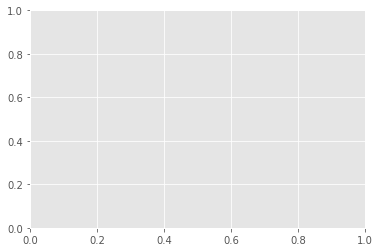

In [82]:
style.use('ggplot')

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

In [83]:
def animate(i):
    graph_data = open("twitter_out.txt","r").read()
    lines = graph_data.split('\n')
    
    xar =[]
    yar = []
    
    x = 0
    y = 0
    
    for l in lines:
        x += 1
        if "pos" in l:
            y += 1
        elif "neg" in l:
            y -= 1
        
        xar.append(x)
        yar.append(y)
        

    ax1.clear()
    ax1.plot(xar,yar)

ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()

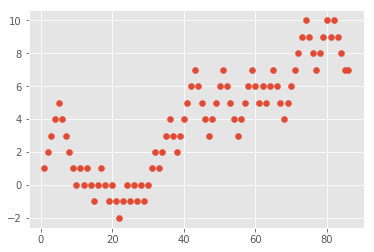

In [85]:
graph_data = open("twitter_out.txt","r").read()
lines = graph_data.split('\n')
xar =[]
yar = []
    
x = 0
y = 0
    
for l in lines:
    x += 1
    if "pos" in l:
        y += 1
    elif "neg" in l:
        y -= 1
        
    xar.append(x)
    yar.append(y)
        

#ax1.clear()
#ax1.scatter(xar,yar)

plt.scatter(xar, yar)
plt.show()